In [7]:
import os
import torch
import huggingface_hub as hf_hub

In [3]:
token = os.getenv("HUGGINGFACE_TOKEN")
hf_hub.login(token)

### Translation:

In [6]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

model.safetensors:  28%|##7       | 273M/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [14]:
source_lang = "English"
target_lang = "German"

input_text = f"translate {source_lang} to {target_lang}: How old are you?"

inputs = tokenizer(input_text, return_tensors="pt")

for key, value in inputs.items():
    print(key, value)

input_ids tensor([[13959,  1566,    12,  2968,    10,   571,   625,    33,    25,    58,
             1]])
attention_mask tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [15]:
with torch.no_grad():
    outputs = model.generate(**inputs)

print(len(outputs))
print(outputs)

1
tensor([[   0, 2739,  625,  436,  292,   58,    1]])


In [16]:
print(tokenizer.decode(outputs[0]))

<pad> Wie old sind Sie?</s>


### Image Classification:

##### Datasets library:

In [18]:
from datasets import load_dataset

dataset = load_dataset("adirik/fashion_image_caption-100")
print(dataset["train"][5])

README.md:   0%|          | 0.00/492 [00:00<?, ?B/s]

(…)-00000-of-00001-f9d5fc3e84d36240.parquet:   0%|          | 0.00/22.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=384x384 at 0x1D794B20520>, 'text': 'A dress with Color: Yellow, Department: Dresses, Detail: Ruffle Hem, Fabric-Elasticity: No Sretch, Fit: Fitted, Hemline: Rounded, Material: Woven, Neckline: Scoop, Pattern: All Over Print, Sleeve-Length: Sleeveless, Style: Boho, Type: A Line Skirt, Waistline: High'}


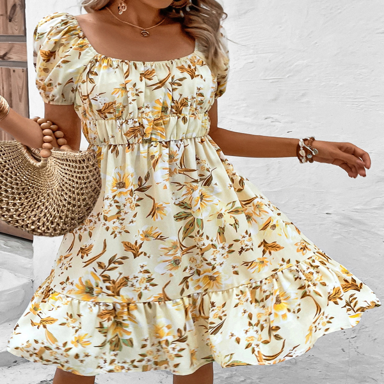

In [19]:
dataset["train"][5]["image"]

In [20]:
from transformers import BlipProcessor, BlipForConditionalGeneration

preprocessor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [25]:
image_inputs = preprocessor(dataset["train"][0]["image"], return_tensors="pt")

for key, value in image_inputs.items():
    print(key, value.shape)

pixel_values torch.Size([1, 3, 384, 384])


In [26]:
with torch.no_grad():
    outputs = model.generate(**image_inputs)

caption = preprocessor.decode(outputs[0], skip_special_tokens=True)
print(caption)

a woman wearing a yellow sequin dress


In [27]:
def replace_caption(data):
    inputs = preprocessor(data["image"], return_tensors="pt")

    with torch.no_grad():
        output = model.generate(**inputs)

    caption = preprocessor.decode(output[0], skip_special_tokens=True)

    data["text"] = caption
    return data

new_dataset = dataset.map(replace_caption)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [31]:
print(new_dataset["train"][5]["text"])
print(dataset["train"][5]["text"])

a woman wearing a yellow floral print dress
A dress with Color: Yellow, Department: Dresses, Detail: Ruffle Hem, Fabric-Elasticity: No Sretch, Fit: Fitted, Hemline: Rounded, Material: Woven, Neckline: Scoop, Pattern: All Over Print, Sleeve-Length: Sleeveless, Style: Boho, Type: A Line Skirt, Waistline: High
